#### Import the libraries

In [1]:
import os
import io
import ast
import json
import base64
import cv2 as cv
import numpy as np
import pandas as pd
from tqdm import tqdm
from imageio import imread
from google.colab.patches import cv2_imshow

### Connect to google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Multidisciplinary Project

/content/gdrive/MyDrive/Multidisciplinary Project


## Create json files containing info about the video and the products

In [4]:
column_names = ['Title', 'Link', 'Products', 'Products_link', 'Search_criteria', 'Image_name']

# Read the excel file
video_list = pd.read_excel('Movie_list.xlsx',
                         header=0,
                         names=column_names)

In [5]:
video_list

,Title,Link,Products,Products_link,Search_criteria,Image_name
0,"Iron Man vs Loki - ""We have a Hulk"" - Suit Up ...",https://www.youtube.com/watch?v=NsRLOV4pHyk&t=6s,US Tour '78 T-Shirt nero Black Sabbath,https://www.emp-online.it/p/us-tour-%2778/2346...,T-shirt,US Tour '78 T-Shirt nero Black Sabbath.png
1,Bruce Banner and Tony Stark put Jarvis Into Bo...,https://www.youtube.com/watch?v=kuvJRGrInPU,DJ DRAGON CLASSIC HEATHER NAVY T-SHIRT,https://shop.brucelee.com/product/XLCT286/dj-d...,T-shirt,DJ DRAGON CLASSIC HEATHER NAVY T-SHIRT.png
2,The Devil Wears Prada (4/5) Movie CLIP - Andy ...,https://www.youtube.com/watch?v=HSPYgwP9R84,"Louis Poulsen, blazer à détail de patch (2005)",https://www.louispoulsen.com/it-it/catalog/Pro...,"A lamp, A jacket","Louis Poulsen.png, blazer à détail de patch (2..."
3,The Devil Wears Prada (2/5) Movie CLIP - Andy'...,https://www.youtube.com/watch?v=b2f2Kqt_KcE,Error,Error,A table,Error
4,"The Escape from Limbo, Inception ending, Deja Vu",https://www.youtube.com/watch?v=a5R3_ToFRGg,Poltrona Willow di Charles Rennie Mackintosh,https://www.deesup.com/shop/poltrona-willow-di...,A chair,Poltrona Willow di Charles Rennie Mackintosh.png
5,Inception - Ending,https://www.youtube.com/watch?v=XQPy88-E2zo,Giroscopio in Metallo Trottola d'Argento accurata,https://www.amazon.it/Giroscopio-Trottola-Gioc...,Trottola,Giroscopio in Metallo Trottola d'Argento accur...
6,Demi Lovato - I Love Me (Official Video),https://www.youtube.com/watch?v=vImvzQCb0o8,Error,Error,Error,Error
7,Katy Perry - Hot N Cold (Official),https://www.youtube.com/watch?v=kTHNpusq654,TRACK JACKET ADICOLOR CLASSICS FIREBIRD,https://www.adidas.it/track-jacket-adicolor-cl...,Black jacket,TRACK JACKET ADICOLOR CLASSICS FIREBIRD.png
8,NO TIME TO DIE (2021) | Nuovo Trailer ITA del ...,https://www.youtube.com/watch?v=XCQaWwHIrkU,007 Joe,https://bartonperreira.com/products/joe-sun?va...,Black glasses,007 Joe.png


### Create the dictionaries

In [6]:
# Dictionary containing the info about all the video
video_info = {}
# Dictionary containing the info about all the products
product_info = {}
# Dictionary containing the pairs video-product
video_product_info = {}

# For each row in the dataframe
for info in tqdm(video_list.to_numpy()):
  # Read the title of the vide
  video_title = info[0]
  # Convert the strings into lists
  product_names = info[2].split(", ")
  products_link = info[3].split(", ")
  search_criteria = info[4].split(", ")
  image_name = info[5].split(", ")

  # Save the info about the video
  # Create the sub-dictionary for the video
  video_info[video_title] = {}
  video_info[video_title]['Title'] = video_title
  video_info[video_title]['Link'] = info[1]
  video_info[video_title]['Products'] = product_names

  # If no errors in the row (TODO: extend the check to all the rows)
  if products_link[0].removeprefix('"').removesuffix('"') != "Error":
    # Save the info about each product
    for product_index in range(len(product_names)):
      # Create the sub-dictionary of the product
      product_info[product_names[product_index]] = {}
      product_info[product_names[product_index]]['Name'] = product_names[product_index]
      product_info[product_names[product_index]]['Link'] = products_link[product_index]
      product_info[product_names[product_index]]['Searching criteria'] = search_criteria[product_index]
      # Read and encode the image using base64
      with open(r"Product_images/{}".format(image_name[product_index].removeprefix('"').removesuffix('"')), "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode('utf-8')
        product_info[product_names[product_index]]['Image'] = encoded_image

100%|██████████| 9/9 [00:03<00:00,  2.97it/s]


## Save the dictionaries as Json files

In [7]:
with open('Documents/video_list.json', 'w') as video_list_file:
  json.dump(video_info, video_list_file, indent=3)

In [8]:
with open('Documents/product_list.json', 'w') as product_list_file:
  json.dump(product_info, product_list_file, indent=3)

### Verify the decoding of the images

<ipython-input-10-5bcf4847e87f>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(io.BytesIO(base64.b64decode(decoded_image)))


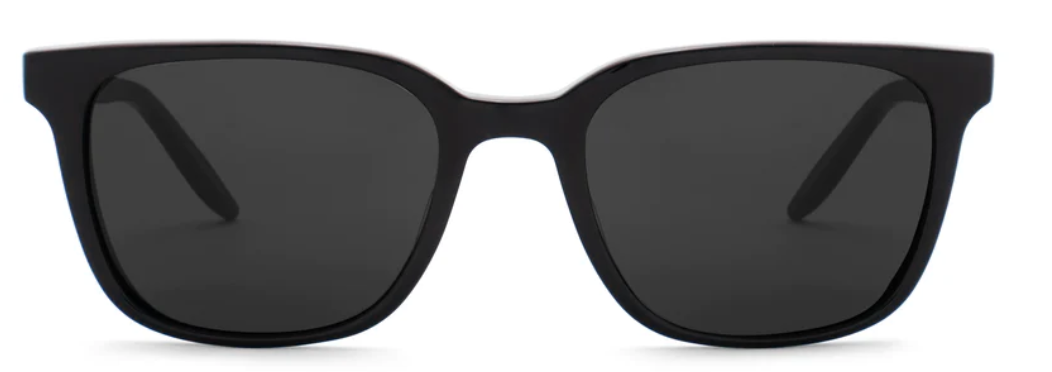

In [10]:
# Get the encoding of a random image
encoded_image = product_info['007 Joe']['Image'].encode('utf-8')

# Decode the base64 string
decoded_image = encoded_image.decode()
img = imread(io.BytesIO(base64.b64decode(decoded_image)))

# Plot the image
cv2_imshow(img)